In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
tf.compat.v1.losses.sparse_softmax_cross_entropy

<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
np.ndim(X_test)

3

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
import matplotlib.pyplot as plt

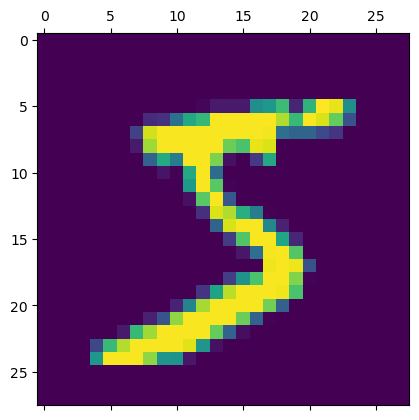

In [9]:
plt.matshow(X_train[0])
plt.show()

In [10]:
y_train[0]

5

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flatten = X_train.reshape(60000, 28*28)

In [13]:
X_train.reshape(60000, 28*28).shape

(60000, 784)

In [14]:
X_train.shape[0]

60000

In [15]:
len(X_train)

60000

In [16]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

In [17]:
X_train.reshape(60000, 28*28).shape

(60000, 784)

In [18]:
X_train.reshape(len(X_train), 28*28)[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [19]:
X_train_flatten = X_train_flatten/255

In [20]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

In [22]:
model.compile('adam', loss="SparseCategoricalCrossentropy", metrics = ['Accuracy'])

In [23]:
model.fit(X_train_flatten, y_train, epochs= 10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4688 - Accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - Accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - Accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - Accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - Accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2623 - Accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - Accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2557 - Accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2533 - Accuracy: 0.9294
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
X_test_flattern = X_test.reshape(10000, 784)

In [26]:
X_test_flattern = X_test_flattern/255

In [27]:
model.evaluate(X_test_flattern, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2664 - Accuracy: 0.9273


[0.2664269208908081, 0.927299976348877]

In [28]:
predicted = model.predict(X_test_flattern)

313/313 [==============================] - 1s 3ms/step


In [29]:
predicted

array([[4.2771581e-03, 2.0528450e-08, 2.4010718e-02, ..., 9.9984604e-01,
        6.5333292e-02, 6.6223657e-01],
       [4.4996661e-01, 1.0510191e-02, 9.9971110e-01, ..., 1.1871852e-15,
        1.2841526e-01, 2.9112379e-12],
       [1.3673457e-04, 9.9487185e-01, 6.8867415e-01, ..., 3.0559614e-02,
        3.8290143e-01, 3.9807104e-02],
       ...,
       [1.0257438e-06, 5.9076081e-07, 7.7550340e-04, ..., 1.3197859e-01,
        4.6525812e-01, 7.3699248e-01],
       [1.4135431e-05, 5.4301534e-05, 2.0654719e-05, ..., 1.0160362e-05,
        6.7529863e-01, 1.2331706e-05],
       [1.5160751e-03, 2.2201763e-11, 1.7259271e-01, ..., 1.4275028e-11,
        2.8802378e-05, 9.8903961e-09]], dtype=float32)

In [30]:
predicted[0]

array([4.2771581e-03, 2.0528450e-08, 2.4010718e-02, 9.6527994e-01,
       1.4298556e-03, 1.4140193e-01, 2.8574737e-08, 9.9984604e-01,
       6.5333292e-02, 6.6223657e-01], dtype=float32)

In [31]:
y_test[0]

7

In [32]:
a = predicted[0]

In [33]:
max(a)

0.99984604

In [34]:
np.argmax(a)

7

In [35]:
predicted_y = []
for i in predicted:
    predicted_y.append(np.argmax(i))

In [36]:
predicted_y

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [37]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=predicted_y)

In [38]:
import seaborn as sns

<Axes: >

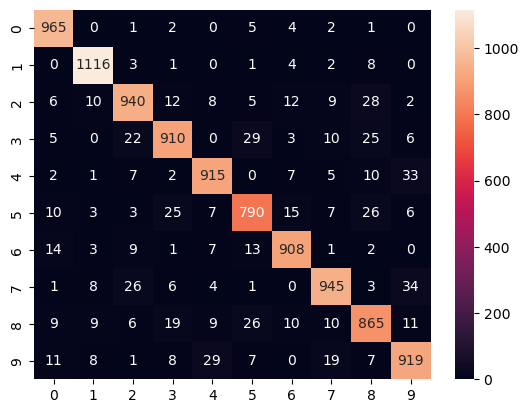

In [39]:
sns.heatmap(cm, annot=True, fmt='d')

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [41]:
model.compile(optimizer='adam', loss= "SparseCategoricalCrossentropy", metrics=['Accuracy'])

In [42]:
model.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2743 - Accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1216 - Accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0871 - Accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - Accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0540 - Accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0433 - Accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - Accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - Accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241 - Accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.02

In [43]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape= (784, )),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])

In [44]:
model.compile(optimizer='adam', loss="SparseCategoricalCrossentropy", metrics=['Accuracy'])

In [45]:
model.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2353 - Accuracy: 0.9281
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1433 - Accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1218 - Accuracy: 0.9639
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1081 - Accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1020 - Accuracy: 0.9707
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0916 - Accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0885 - Accuracy: 0.9740
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0846 - Accuracy: 0.9753
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0852 - Accuracy: 0.9758
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [46]:
model.evaluate(X_test_flattern, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1342 - Accuracy: 0.9683


[0.13419392704963684, 0.9682999849319458]